# Heart Disease Prediction

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### About
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.


Attribute Information:

> 1.age = age in years

> 2.sex= (1 = male; 0 = female)

> 3.cp = chest pain type

> 4.trestbpsr = esting blood pressure (in mm Hg on admission to the hospital)

> 5.chol = serum cholestoral in mg/dl

> 6.fbs = (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

> 7.restecg = resting electrocardiographic results

> 8.thalach = maximum heart rate achieved

> 9.exang = exercise induced angina (1 = yes; 0 = no)

> 10.oldpeak = ST depression induced by exercise relative to rest

> 11.slope = the slope of the peak exercise ST segment

> 12.ca = number of major vessels (0-3) colored by flourosopy

> 13.thal = 3 = normal; 6 = fixed defect; 7 = reversable defect

> 14.target = 1 or 0

# Data Exploration

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/abhisheksinghblr/datasets/master/datasets_33180_43520_heart.csv')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.shape

(303, 14)

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

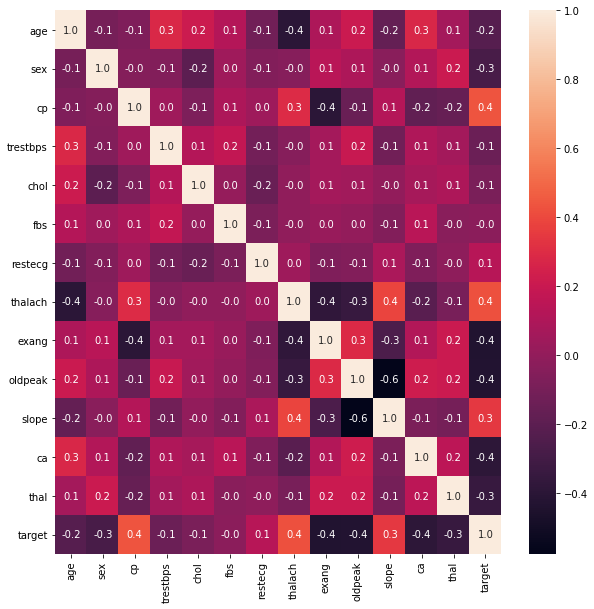

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.1f')
plt.show()

In [11]:
#age analysis
df.age.value_counts()[:10]

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

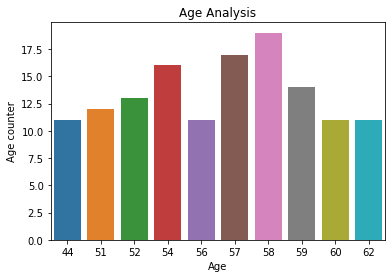

In [12]:
sns.barplot(x= df.age.value_counts()[:10].index, y= df.age.value_counts()[:10].values  )
plt.xlabel('Age')
plt.ylabel("Age counter")
plt.title("Age Analysis")
plt.show

In [13]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [14]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of patients dont have heart disease: {:.2f}%".format((countNoDisease/(len(df.target)))*100))
print("Percentage of patients have heart disease: {:.2f}%".format((countHaveDisease/(len(df.target)))*100))

Percentage of patients dont have heart disease: 45.54%
Percentage of patients have heart disease: 54.46%


In [15]:
countFemale= len(df[df.sex == 0])
countMale = len(df[df.sex == 1])
print("% of Female Patients: {:.2f}%".format((countFemale/(len(df.sex))*100)))
print("% of male Patients: {:.2f}%".format((countMale/(len(df.sex))*100)))

% of Female Patients: 31.68%
% of male Patients: 68.32%


In [16]:
young_ages = df[(df.age>=29)&(df.age<40)]
middle_ages = df[(df.age>=40)&(df.age<55)]
elderly_ages = df[(df.age>=55)]
print("young ages", len(young_ages))
print("middle ages", len(middle_ages))
print("elderly ages", len(elderly_ages))

young ages 16
middle ages 128
elderly ages 159


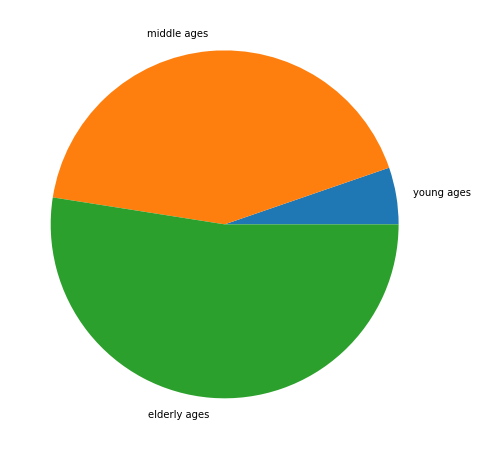

In [17]:
colors = ['blue','green', 'red']
explode= [1,1,1]
plt.figure(figsize= (8,8))
plt.pie([len(young_ages), len(middle_ages), len(elderly_ages)], labels=['young ages', 'middle ages', 'elderly ages'])
plt.show()

In [18]:
#chest pain analysis
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [19]:
df.target.unique()

array([1, 0])

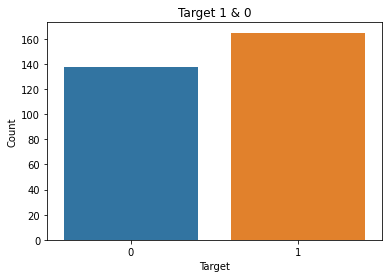

In [20]:
sns.countplot(df.target)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Target 1 & 0')
plt.show()

In [21]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


## Initializing Setup

In [23]:
from pycaret import classification

In [25]:
classification_setup = classification.setup(data=df, target='target')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,1451
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(303, 14)"
4,Missing Values,False
5,Numeric Features,5
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## Compare Models

In [26]:
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.830700,0.906100,0.879500,0.830300,0.852200,0.653600
1,Random Forest Classifier,0.826400,0.895500,0.855300,0.837700,0.844200,0.647100
2,Ridge Classifier,0.825800,0.000000,0.887100,0.819900,0.847500,0.642300
3,Linear Discriminant Analysis,0.821200,0.907900,0.879500,0.818200,0.843500,0.633600
4,Extra Trees Classifier,0.821200,0.895300,0.818900,0.859400,0.834000,0.639300
5,CatBoost Classifier,0.821000,0.888500,0.862100,0.823300,0.840800,0.634200
6,Extreme Gradient Boosting,0.816200,0.890200,0.844700,0.829200,0.834800,0.625200
7,Light Gradient Boosting Machine,0.802600,0.877800,0.854500,0.801200,0.825000,0.596400
8,Gradient Boosting Classifier,0.797600,0.878200,0.819700,0.819200,0.817700,0.588000
9,Naive Bayes,0.792900,0.879500,0.765900,0.838000,0.796300,0.586000


## Create Models

In [27]:
lr = classification.create_model("lr")

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7273,0.8250,0.8333,0.7143,0.7692,0.4407
1,0.8182,0.9333,0.9167,0.7857,0.8462,0.6271
2,0.9524,1.0000,0.9091,1.0000,0.9524,0.9050
3,0.8095,0.9091,0.8182,0.8182,0.8182,0.6182
4,0.9524,0.9545,1.0000,0.9167,0.9565,0.9041
5,0.8571,0.8455,0.9091,0.8333,0.8696,0.7123
6,0.8571,0.9455,0.9091,0.8333,0.8696,0.7123
7,0.7619,0.8704,0.7500,0.8182,0.7826,0.5205
8,0.9048,0.9537,0.9167,0.9167,0.9167,0.8056
9,0.6667,0.8241,0.8333,0.6667,0.7407,0.2899


In [28]:
rf = classification.create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6364,0.7625,0.6667,0.6667,0.6667,0.2667
1,0.8182,0.9042,0.8333,0.8333,0.8333,0.6333
2,0.9048,0.9773,0.9091,0.9091,0.9091,0.8091
3,0.9524,0.9364,1.0000,0.9167,0.9565,0.9041
4,0.9048,0.9636,0.9091,0.9091,0.9091,0.8091
5,0.7619,0.7955,0.8182,0.7500,0.7826,0.5205
6,0.9524,0.9909,1.0000,0.9167,0.9565,0.9041
7,0.8095,0.8935,0.7500,0.9000,0.8182,0.6216
8,0.8571,0.9491,0.8333,0.9091,0.8696,0.7123
9,0.6667,0.7824,0.8333,0.6667,0.7407,0.2899


## Tune Model

In [29]:
tuned_lr = classification.tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7727,0.8083,0.8333,0.7692,0.8000,0.5378
1,0.8182,0.9333,0.8333,0.8333,0.8333,0.6333
2,0.9048,1.0000,0.8182,1.0000,0.9000,0.8108
3,0.7619,0.9091,0.7273,0.8000,0.7619,0.5249
4,0.9524,0.9455,1.0000,0.9167,0.9565,0.9041
5,0.8095,0.8455,0.8182,0.8182,0.8182,0.6182
6,0.8571,0.9455,0.9091,0.8333,0.8696,0.7123
7,0.7619,0.8611,0.7500,0.8182,0.7826,0.5205
8,0.7619,0.9352,0.7500,0.8182,0.7826,0.5205
9,0.7143,0.8426,0.8333,0.7143,0.7692,0.4000


In [30]:
tuned_rf = classification.tune_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7727,0.8417,0.7500,0.8182,0.7826,0.5455
1,0.8182,0.8833,0.9167,0.7857,0.8462,0.6271
2,0.9524,0.9909,0.9091,1.0000,0.9524,0.9050
3,0.9048,0.9455,0.9091,0.9091,0.9091,0.8091
4,0.9048,0.9364,0.9091,0.9091,0.9091,0.8091
5,0.8571,0.8545,0.9091,0.8333,0.8696,0.7123
6,0.8095,0.9455,0.8182,0.8182,0.8182,0.6182
7,0.7619,0.8889,0.7500,0.8182,0.7826,0.5205
8,0.9048,0.9537,0.9167,0.9167,0.9167,0.8056
9,0.6667,0.8241,0.8333,0.6667,0.7407,0.2899


## Ensemble Model

In [34]:
blender = classification.blend_models(estimator_list=[tuned_lr, tuned_rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7727,0.0,0.7500,0.8182,0.7826,0.5455
1,0.8182,0.0,0.8333,0.8333,0.8333,0.6333
2,0.9048,0.0,0.8182,1.0000,0.9000,0.8108
3,0.8095,0.0,0.7273,0.8889,0.8000,0.6216
4,0.9048,0.0,0.9091,0.9091,0.9091,0.8091
5,0.8095,0.0,0.8182,0.8182,0.8182,0.6182
6,0.8095,0.0,0.8182,0.8182,0.8182,0.6182
7,0.7143,0.0,0.6667,0.8000,0.7273,0.4324
8,0.8095,0.0,0.7500,0.9000,0.8182,0.6216
9,0.7143,0.0,0.7500,0.7500,0.7500,0.4167


In [35]:
stacked = classification.stack_models(estimator_list=[tuned_lr, tuned_rf])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7273,0.8167,0.8333,0.7143,0.7692,0.4407
1,0.8182,0.9250,0.9167,0.7857,0.8462,0.6271
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8095,0.9091,0.8182,0.8182,0.8182,0.6182
4,0.9524,0.9364,1.0000,0.9167,0.9565,0.9041
5,0.8571,0.8455,0.9091,0.8333,0.8696,0.7123
6,0.8571,0.9364,0.9091,0.8333,0.8696,0.7123
7,0.7143,0.8611,0.7500,0.7500,0.7500,0.4167
8,0.9048,0.9537,0.9167,0.9167,0.9167,0.8056
9,0.7143,0.8241,0.8333,0.7143,0.7692,0.4000


In [43]:
stack_net = classification.create_stacknet(estimator_list=[[tuned_lr], [tuned_rf]])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.6818,0.8167,0.7500,0.6923,0.7200,0.3529
1,0.8182,0.9250,0.9167,0.7857,0.8462,0.6271
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.8095,0.9091,0.8182,0.8182,0.8182,0.6182
4,0.9524,0.9455,1.0000,0.9167,0.9565,0.9041
5,0.8571,0.8455,0.9091,0.8333,0.8696,0.7123
6,0.8571,0.9455,0.9091,0.8333,0.8696,0.7123
7,0.7143,0.8611,0.7500,0.7500,0.7500,0.4167
8,0.9048,0.9444,0.9167,0.9167,0.9167,0.8056
9,0.6667,0.8333,0.8333,0.6667,0.7407,0.2899


## Plot Model Results

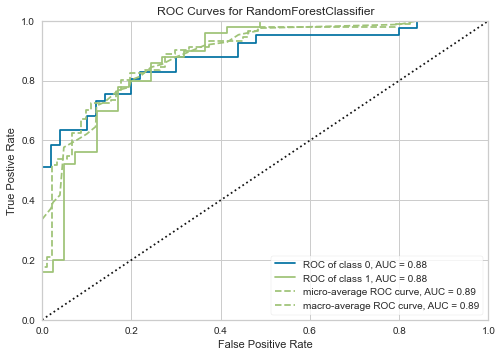

In [47]:
# AUC-ROC plot
classification.plot_model(tuned_rf, plot = 'auc')

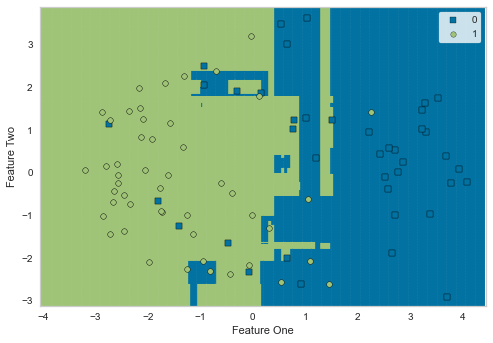

In [49]:
# Decision Boundary
classification.plot_model(tuned_rf, plot = 'boundary')

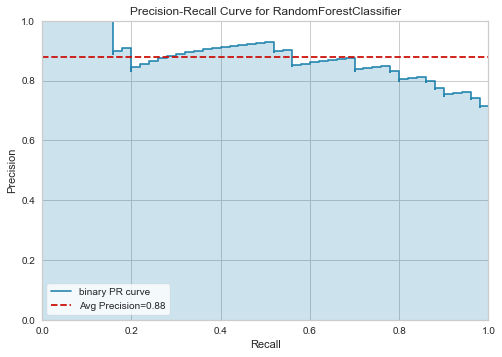

In [50]:
# Precision Recall Curve
classification.plot_model(tuned_rf, plot = 'pr')

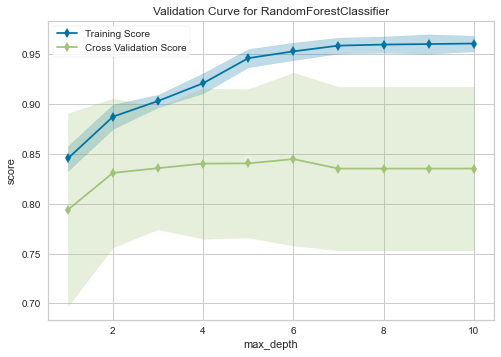

In [52]:
# Validation Curve
classification.plot_model(tuned_rf, plot = 'vc')

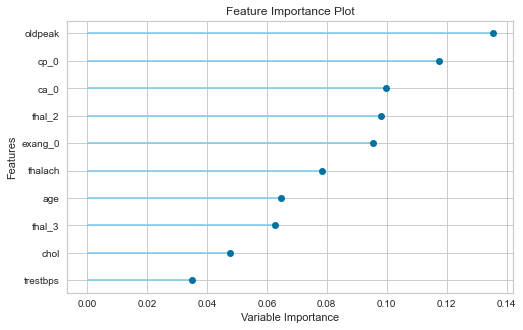

In [53]:
# Dimension Learning
classification.plot_model(tuned_rf, plot = 'feature')

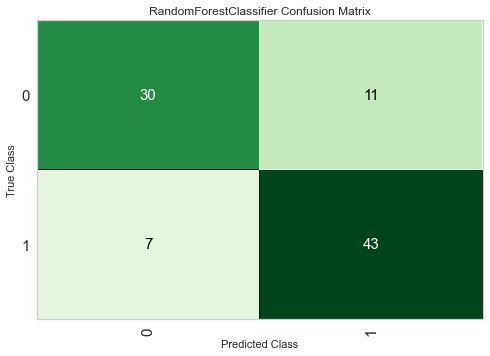

In [55]:
# Confusion Matrix
classification.plot_model(tuned_rf, plot = 'confusion_matrix')

## Evaluate Model

In [57]:
classification.evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

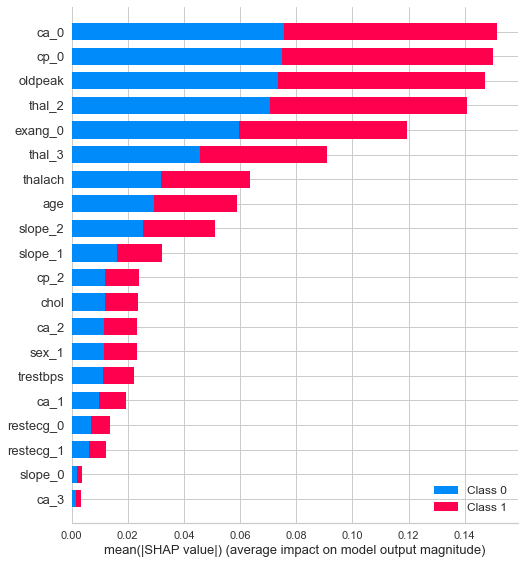

In [58]:
classification.interpret_model(tuned_rf)

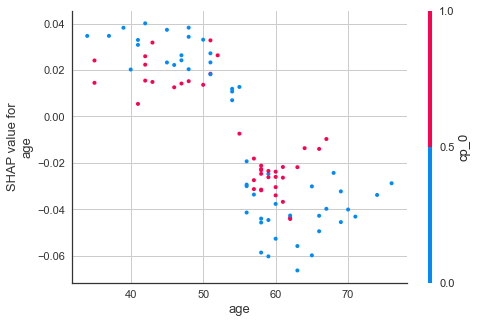

In [59]:
classification.interpret_model(tuned_rf,plot='correlation')

## Calibrate Model

In [67]:
calibrated = classification.calibrate_model(tuned_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7727,0.8167,0.8333,0.7692,0.8000,0.5378
1,0.8636,0.9333,0.9167,0.8462,0.8800,0.7227
2,0.9524,1.0000,0.9091,1.0000,0.9524,0.9050
3,0.7619,0.9091,0.7273,0.8000,0.7619,0.5249
4,0.9524,0.9545,1.0000,0.9167,0.9565,0.9041
5,0.8571,0.8455,0.9091,0.8333,0.8696,0.7123
6,0.8095,0.9364,0.9091,0.7692,0.8333,0.6147
7,0.7143,0.8611,0.7500,0.7500,0.7500,0.4167
8,0.9048,0.9630,0.9167,0.9167,0.9167,0.8056
9,0.6667,0.8426,0.8333,0.6667,0.7407,0.2899


## Predict Model

In [68]:
predictions_holdout = classification.predict_model(calibrated)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Calibrated Classifier C V,0.8571,0.901,0.96,0.8136,0.8807,0.7056
